## En este scrip se ejecuta un analisis exploratorio

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [136]:
# CARGAR DATOS YA PROCESADOS
df_games_clean = pd.read_csv('games_clean.csv')

In [137]:
df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  platform_group   16444 non-null  object 
 12  Rating_sem       16444 non-null  object 
 13  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


¿Cuantos juegos fueron lanzados por año?

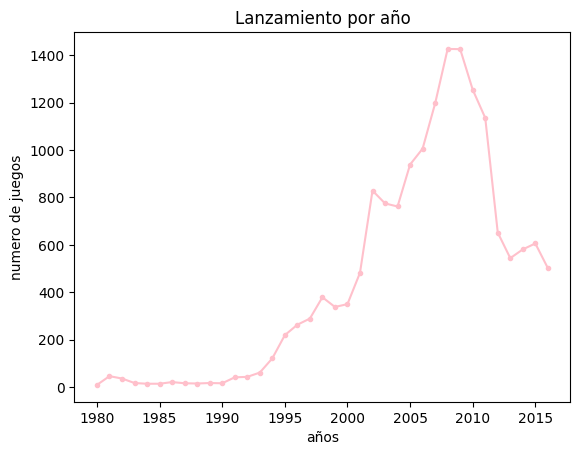

In [138]:
df_games_por_year = df_games_clean.groupby('year_of_release')['name'].count()

df_games_por_year.plot(kind='line',
                       title='Lanzamiento por año',
                       ylabel= 'numero de juegos',
                       xlabel= 'años',
                       color = 'pink',
                       marker = '.')


plt.show()

No todos los años son relevantes, por tnto se quitaran los años de bajo volumen de produccion 

In [139]:
df_games_clean.query('year_of_release >= 1995', inplace=True)


Como se han comportado las ventas en las distintas plataformas

In [140]:
df_sales_per_platform = df_games_clean.pivot_table(
    index= 'year_of_release',
    columns= 'platform_group',
    values= 'total_sales',
    aggfunc= 'sum',
    fill_value= 0
)

df_sales_per_platform

platform_group,Nintendo,Other,PC,PlayStation,Xbox
year_of_release,,,,,
1995,35.80,12.14,4.22,35.96,0.00
1996,86.05,7.79,10.61,94.70,0.00
1997,46.86,6.77,11.27,136.17,0.00
1998,76.36,7.20,3.26,169.49,0.00
1999,96.13,5.71,4.74,144.53,0.00
2000,53.80,6.67,4.66,135.54,0.99
2001,100.36,1.35,5.47,202.02,22.26
2002,126.05,0.29,8.57,212.05,48.01
2003,107.28,0.00,8.84,186.38,55.04


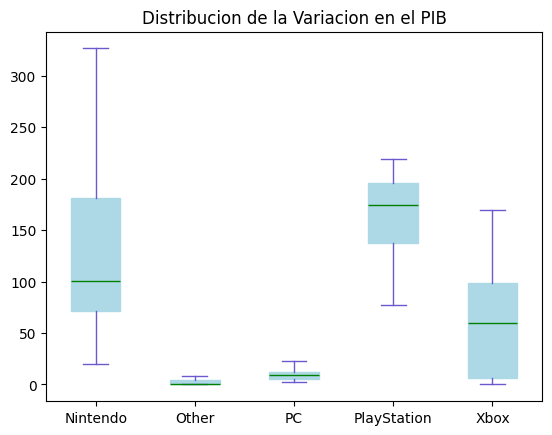

In [141]:
df_sales_per_platform.plot(kind= 'box',    showfliers=False,
    title="Distribucion de la Variacion en el PIB",
    color = dict(boxes="lightblue", whiskers="slateblue", medians="green", caps="slateblue"),
    patch_artist=True)

plt.show()


No todas las plataformas son relevantes, por tanto se quitaran aquellas que no tienen ventas significativas

In [142]:
lista = ['Nintendo', 'PlayStation','Xbox']

df_games_clean.query('platform_group == @lista',inplace=True)




¿Existen diferencias significativas en el valor medio de ventas anuales entre nintendo y playstation

In [143]:
#Extraer las muestras para la inferencia estadistica
muestra_NS = df_sales_per_platform['Nintendo']
muestra_PS = df_sales_per_platform['PlayStation']

PRUEBA 1
- H NULA: LAS VARIANZAS SON IGUALES
- H ALTERNATIVA: LAS VARIANZAS SON DIFERENTES 

In [144]:
#definir un umbral de rechazo
p_umbral = 0.1


In [145]:
#Prueba del levene

p_leven = st.levene(muestra_NS,muestra_PS).pvalue

print (f' Valor p: {p_leven:.1%}')

if p_leven > p_umbral:
    print ('No se rechaza la hipotesis nula de que las varianzas sean iguales')
else:
    print ('Si se rechaza la hipotesis nula de que las varianzas sean iguales')

 Valor p: 5.6%
Si se rechaza la hipotesis nula de que las varianzas sean iguales


## Prueba 2

- H NULA: EL PROMEDIO DE VENTAS ES IGUAL
- H ALTERNATIVA: EL PROMEDIO DE VENTAS ES DIFERENTE

In [146]:
p_ttest = st.ttest_ind (muestra_NS,muestra_PS, equal_var=False).pvalue

print (f' Valor p: {p_ttest:.1%}')

if p_ttest> p_umbral:
    print ('No se rechaza la hipotesis nula de que las varianzas sean iguales')
else:
    print ('Si se rechaza la hipotesis nula de que las varianzas sean iguales')

 Valor p: 24.1%
No se rechaza la hipotesis nula de que las varianzas sean iguales


<Axes: ylabel='Density'>

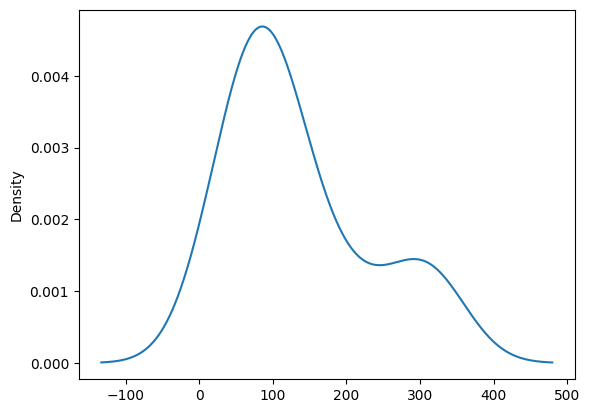

In [147]:
muestra_NS.plot(kind='kde')

In [148]:
caso = muestra_NS.sample(len(muestra_NS),replace=True)
media = caso.mean()
media

np.float64(140.96045454545455)

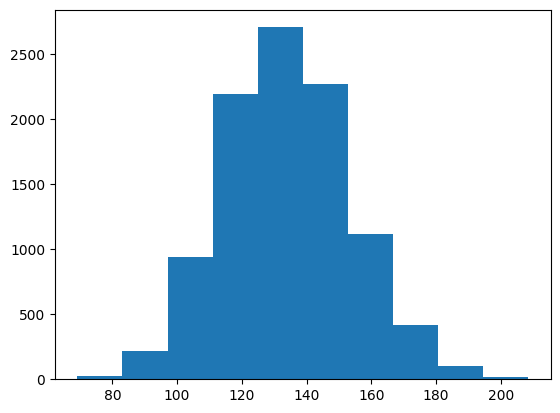

In [149]:
lista_medias = []
for i in range(10000):
    caso = muestra_NS.sample(len(muestra_NS),replace=True)
    media = caso.mean()
    lista_medias.append(media)

plt.hist(x=
lista_medias)

plt.show()